In [28]:
import matplotlib.pyplot as plt
import torch
import torchvision
import seaborn as sns
import pandas as pd
from torchvision import datasets
from torchvision import transforms as tt
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from torch import optim
import torch.nn as nn 
import timm
from torch.utils.data import Subset
import torch.nn.functional as F
import numpy as np
import random
from torch.utils.tensorboard import SummaryWriter


# CIFAR10

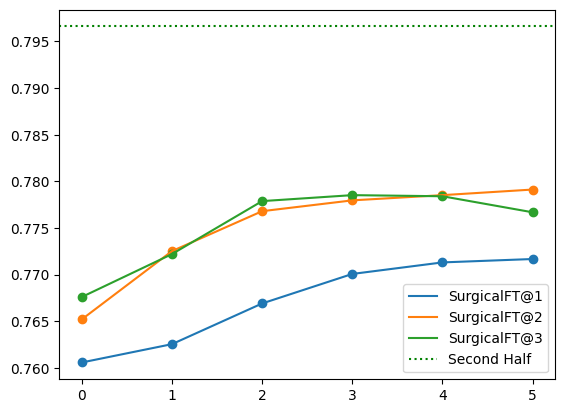

In [44]:
for l in [1,2,3]:
    df = pd.read_csv(f"results/cifar10/values_layer{l}.csv", header=None)
    all_results = df.loc[:, df.columns != 0].values
    plt.plot(all_results.mean(axis=0), label=f"SurgicalFT@{l}")
    plt.scatter(range(all_results.shape[1]), all_results.mean(axis=0))
#plt.axhline(0.7396, label='First Half', color='red', ls=':')
plt.axhline(0.7966, label='Second Half', color='green', ls=':')
plt.legend()
plt.show()

# SVHN

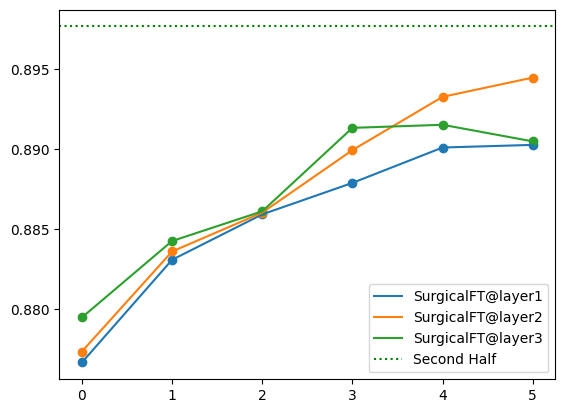

In [42]:
for l in [1,2,3]:
    
    df = pd.read_csv(f"results/svhn/svhn_layer{l}.csv", header=None)
    all_results = df.loc[:, df.columns[1:-2]].values
    plt.plot(all_results.mean(axis=0), label=f"SurgicalFT@layer{l}")
    plt.scatter(range(all_results.shape[1]), all_results.mean(axis=0))

first_half = df.loc[:, df.columns == 7].values.mean()
second_half = df.loc[:, df.columns == 8].values.mean()
#plt.axhline(first_half, label='First Half', color='red', ls=':')
plt.axhline(second_half, label='Second Half', color='green', ls=':')
plt.legend()
plt.show()

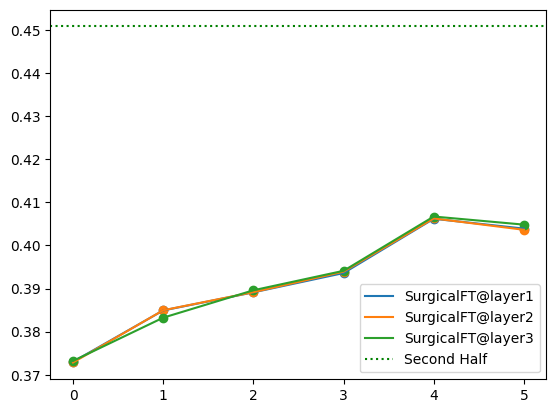

In [52]:
for l in [1,2,3]:
    
    df = pd.read_csv(f"results/cifar100/CIFAR100_layer{l}.csv", header=None)
    all_results = df.loc[:, df.columns[1:-2]].values
    plt.plot(all_results.mean(axis=0), label=f"SurgicalFT@layer{l}")
    plt.scatter(range(all_results.shape[1]), all_results.mean(axis=0))

first_half = df.loc[:, df.columns == 7].values.mean()
second_half = df.loc[:, df.columns == 8].values.mean()
#plt.axhline(first_half, label='First Half', color='red', ls=':')
plt.axhline(second_half, label='Second Half', color='green', ls=':')
plt.legend()
plt.show()

In [28]:
all_results.shape[1]


6

In [21]:
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = torchvision.transforms.functional.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [3]:
from continuum import InstanceIncremental
from continuum.datasets import CIFAR100

dataset = CIFAR100('~/data', transform=tt.ToTensor())
scenario = InstanceIncremental(dataset, nb_tasks=42)

Files already downloaded and verified


In [ ]:

print(f"Number of classes: {scenario.nb_classes}.")
print(f"Number of tasks: {scenario.nb_tasks}.")

for task_id, train_taskset in enumerate(scenario):
    train_loader = DataLoader(train_taskset, batch_size=32, shuffle=True)

    for x, y, t in train_loader:
        grid = make_grid(x[:16])
        show(grid)
        break

In [18]:
from torch.utils.data import DataLoader
from continuum import ClassIncremental
from continuum.datasets import MNIST
from continuum.tasks import split_train_val



dataset = MNIST("my/data/path", download=True, train=True)
scenario = ClassIncremental(
    dataset,
    increment=2,
    initial_increment=2
)

print(f"Number of classes: {scenario.nb_classes}.")
print(f"Number of tasks: {scenario.nb_tasks}.")

for task_id, train_taskset in enumerate(scenario):
    print(task_id)
    train_taskset, val_taskset = split_train_val(train_taskset, val_split=0.1)
    train_loader = DataLoader(train_taskset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_taskset, batch_size=32, shuffle=True)

    for x, y, t in train_loader:
        # Do your cool stuff here
        print(y.unique(), len(train_loader), len(train_loader)*32)
        break

Number of classes: 10.
Number of tasks: 5.
0
tensor([0, 1]) 357 11424
1
tensor([2, 3]) 341 10912
2
tensor([4, 5]) 317 10144
3
tensor([6, 7]) 343 10976
4
tensor([8, 9]) 332 10624


Files already downloaded and verified
